## **Question 1: Read data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap as bm

data3 = np.genfromtxt("../datasets/sampledata3.txt", usecols=3)
data4 = np.genfromtxt("../datasets/sampledata4.txt", usecols=3)

## **Question 2: Errors in data**

In dataset #3 and #4, there are some elements that seem completely different from the rest.
To find and fix this problems:
1. Find the outliers.
2. replace outliers by the average value of two adjency elements.

In [2]:
def modifyOutlier(data):
    """
    This function is used to process the errors in data
    The errors is found based on the outlier
    The ouliters are then modified by 
    """
    data1 = data.copy()
    p25 = np.percentile(data, 25)
    p75 = np.percentile(data, 75)
    iqr = p75 - p25
    maxOutlier = p75 + iqr*1.5
    minOutlier = p25 - iqr*1.5
    outList = np.append(np.where(minOutlier>data)[0],np.where(maxOutlier<data)[0])
    for i in outList:
        if i == len(data)-1:
            data1[i] = (data[i-1] + data[0])/2
        else:
            data1[i] = (data[i-1] + data[i+1])/2
    return (data1)

data3new = modifyOutlier(data3)
data4new = modifyOutlier(data4)


## **Question 3: Means, standard deviation, variance**

In [3]:
print("The sample data 3")
print("mean: %f\nstandard deviation: %f\nvariance: %f\n" %(np.mean(data3new), np.std(data3new), np.var(data3new)))
print("The sample data 4")
print("mean: %f\nstandard deviation: %f\nvariance: %f\n" %(np.mean(data4new), np.std(data4new), np.var(data4new)))

The sample data 3
mean: 26.948643
standard deviation: 1.000744
variance: 1.001488

The sample data 4
mean: 4.958698
standard deviation: 1.280194
variance: 1.638897



## **Question 4: Boxplot, percentile and IQR**

The sample data 3
25th percentile: 26.2556
75th percentile: 27.6243
iqr: 1.368700

The sample data 4
25th percentile: 26.2556
75th percentile: 27.6243
iqr: 1.368700



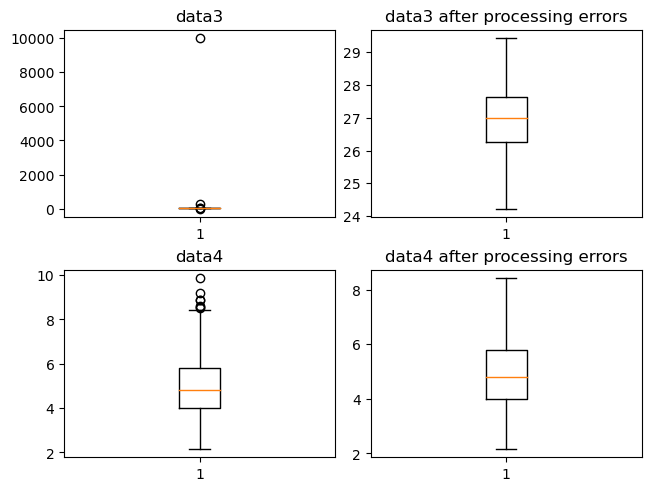

In [4]:
# Question 4: box plot of the data. 25th, 75th percentile and IQR
print("The sample data 3")
print("25th percentile:", np.percentile(data3new, 25))
print("75th percentile:", np.percentile(data3new, 75))
print("iqr: %f\n" %(-np.percentile(data3new, 25) + np.percentile(data3new, 75)))
print("The sample data 4")
print("25th percentile:", np.percentile(data3new, 25))
print("75th percentile:", np.percentile(data3new, 75))
print("iqr: %f\n" %(-np.percentile(data3new, 25) + np.percentile(data3new, 75)))
fig, ax = plt.subplots(2,2, layout="constrained")
ax[0,0].boxplot(data3)
ax[1,0].boxplot(data4)
ax[0,1].boxplot(data3new)
ax[1,1].boxplot(data4new)
ax[0,0].title.set_text('data3')
ax[1,0].title.set_text('data4' )
ax[0,1].title.set_text('data3 after processing errors')
ax[1,1].title.set_text('data4 after processing errors')

## **Question 5: Regression**

data 3
slope: 0.0002217271706755614
intercept: 26.864941313175798

data4
slope: 0.00016710052349972206
intercept: 4.895617171426475


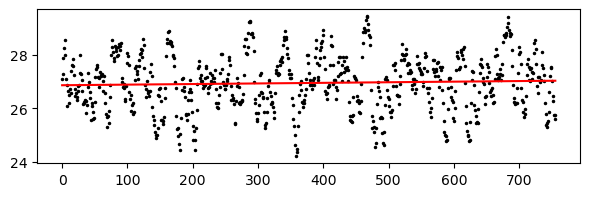

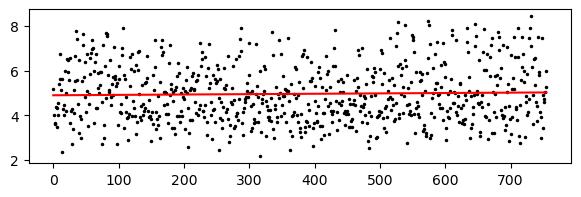

In [5]:

plt.figure(figsize=(7,2))
plt.plot(data3new, "ko", markersize=1.5)
x = [i for i in range(len(data3new))]
[slope, intercept] = np.polyfit(x, data3new, 1)
func = lambda x: slope*x + intercept
mymodel = list(map(func, x))
plt.plot(x, mymodel, 'r')
print("data 3")
print("slope:", slope)
print("intercept:", intercept)
plt.figure(figsize=(7,2))
plt.plot(data4new, "ko", markersize=1.5)
x = [i for i in range(len(data4new))]
[slope, intercept] = np.polyfit(x, data4new, 1)
func = lambda x: slope*x + intercept
mymodel = list(map(func, x))
plt.plot(x, mymodel, 'r')
print("\ndata4")
print("slope:", slope)
print("intercept:", intercept)


## **Question 6: SST and Precipitation**
### **Read data and define ploting function**

In [6]:
def mapplot(data, levels, colorscheme, title):
    plt.figure(num=None, figsize=(4, 4), dpi=200, facecolor='w', edgecolor='k')
    m = bm(projection='cyl', llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution="l")
    m.drawcoastlines(linewidth=0.5)
    x, y = m(lonall, latall)
    jjj=m.contourf(x,y,data[:,:], extend = 'both', cmap=colorscheme, levels=levels)
    m.colorbar(jjj,location='bottom',size="8%",pad='25%')
    m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10,weight='bold',linewidth=0.3)
    m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10,weight='bold', linewidth=0.3)
    plt.title(title,loc='left',fontsize=10,weight='bold')

file1 = "../datasets/era5_sst_1959_2021_25deg.nc"
file2 = "../datasets/era5_precp_1959_2021_25deg.nc"

f1 = nc.Dataset(file1)
f2 = nc.Dataset(file2)
lon = f1.variables['lon'][:]
lat = f1.variables['lat'][:]
sst = f1.variables['sst'][:,:,:]
precp = f2.variables['tp'][:,:,:]
lonall, latall = np.meshgrid(lon, lat)
parallels = np.arange(-90,90+1,30.) # make latitude lines
meridians = np.arange(-180,180,60.) # make longitude lines


### **Mean**

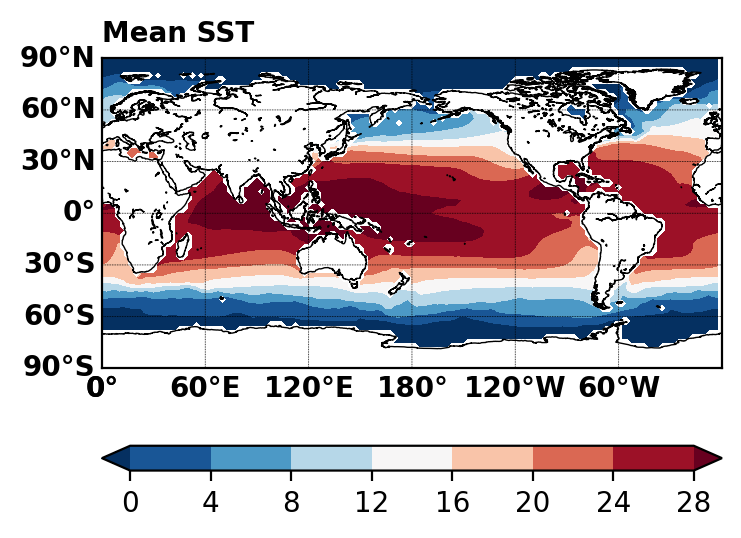

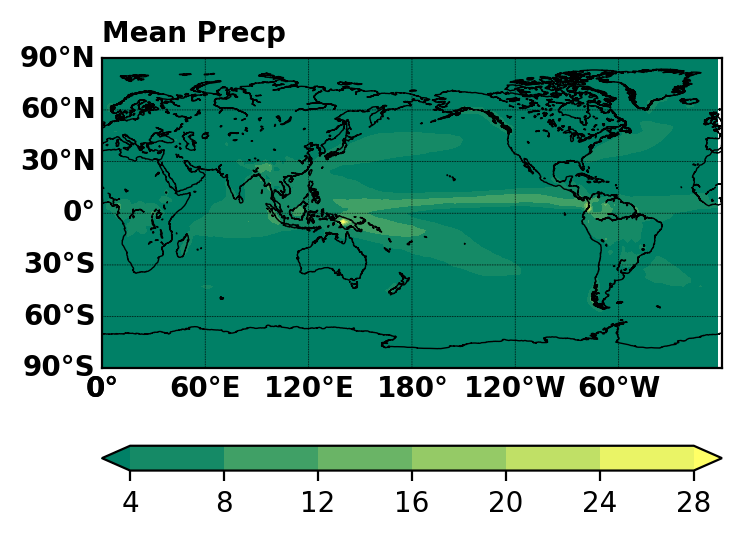

In [7]:
sst_mean = np.mean(sst-273, axis=0)
precp_mean=np.mean(precp, axis=0)
mapplot(sst_mean, None, plt.cm.RdBu_r, "Mean SST")
mapplot(precp_mean, None, "summer", "Mean Precp")

### **Median**

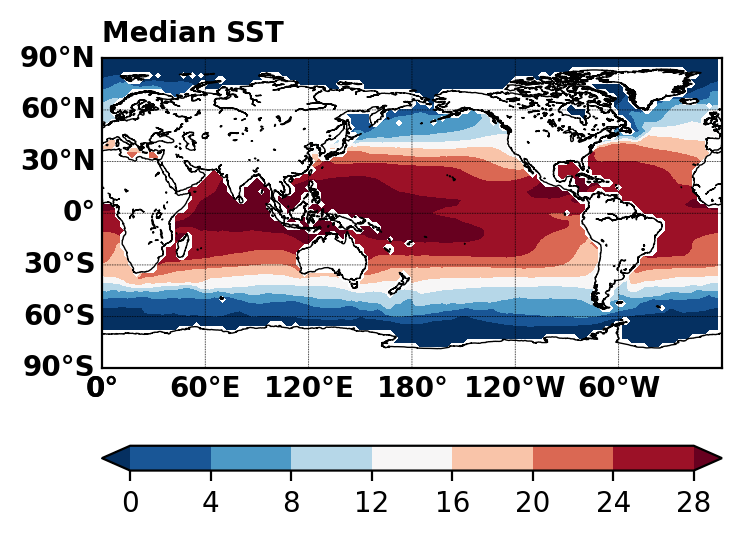

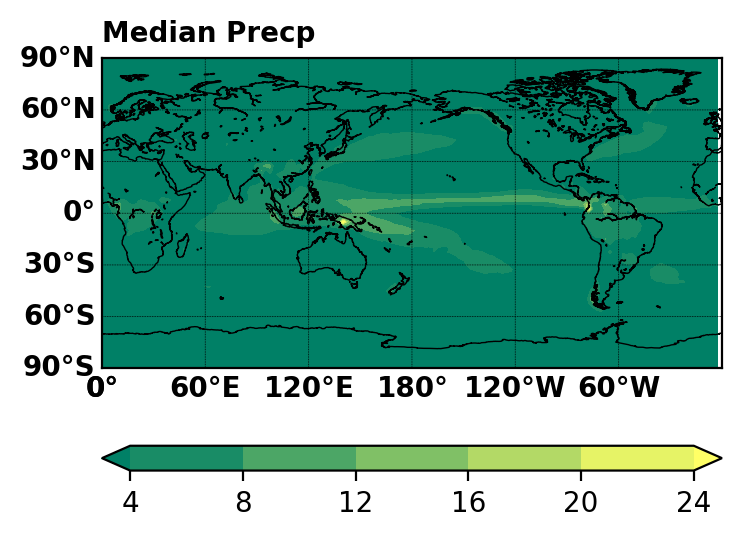

In [8]:
sst_median = np.ma.median(sst-273, axis=0)
precp_median=np.ma.median(precp, axis=0)
mapplot(sst_median, None, plt.cm.RdBu_r, "Median SST")
mapplot(precp_median, None,"summer", "Median Precp")

### **Standard deviation**

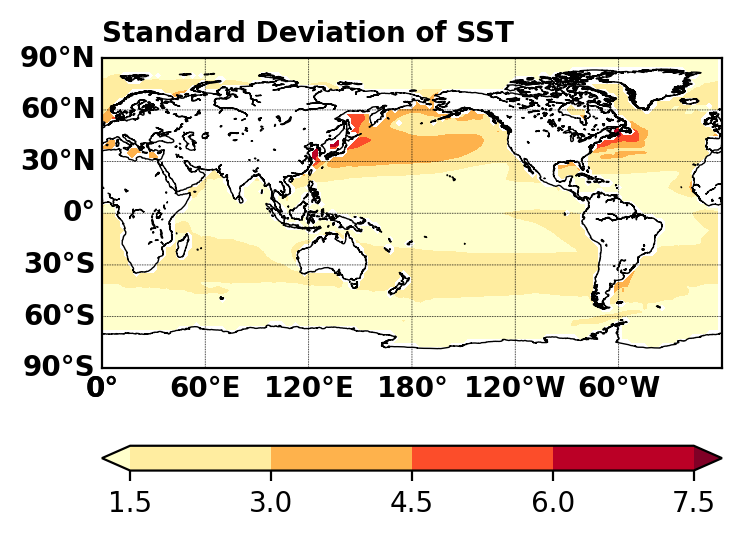

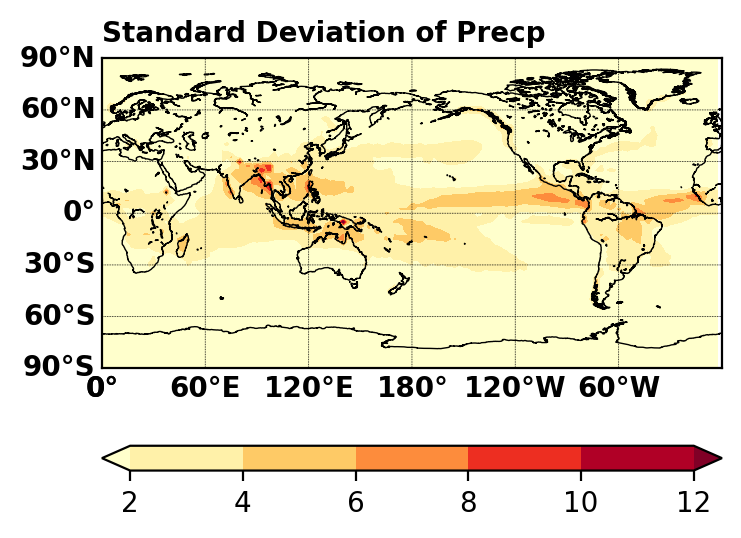

In [9]:
sst_std = np.std(sst-273, axis=0)
precp_std=np.std(precp, axis=0)
mapplot(sst_std, None, plt.cm.YlOrRd, "Standard Deviation of SST")
mapplot(precp_std, None, plt.cm.YlOrRd, "Standard Deviation of Precp")

### **Variance**

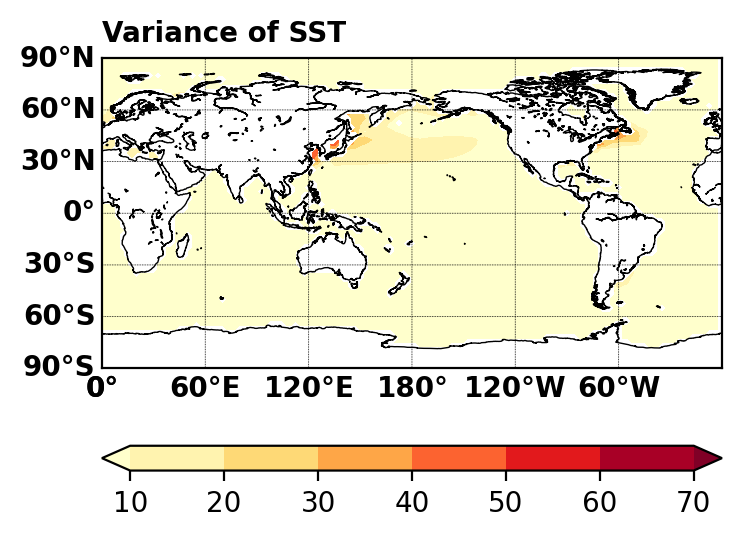

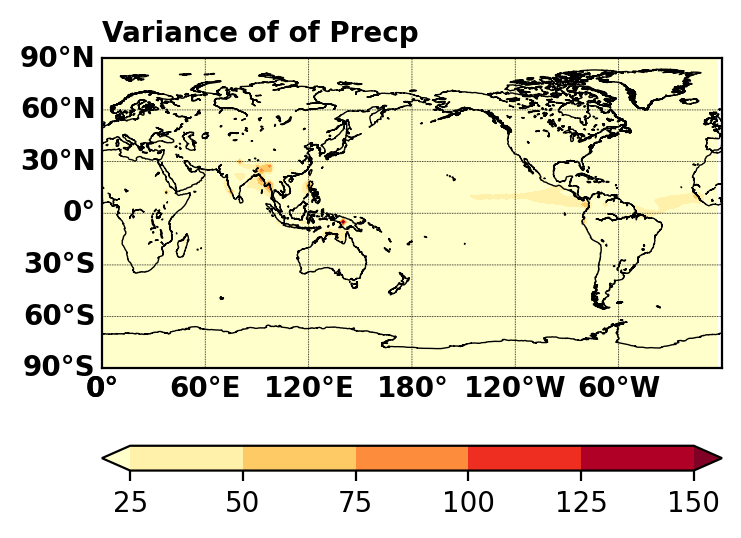

In [10]:
sst_var = np.var(sst-273, axis=0)
precp_var=np.var(precp, axis=0)
mapplot(sst_var, None, plt.cm.YlOrRd, "Variance of SST")
mapplot(precp_var, None, plt.cm.YlOrRd, "Variance of of Precp")

### **95 Percentile**

/home/x/miniconda3/envs/num/lib/python3.11/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


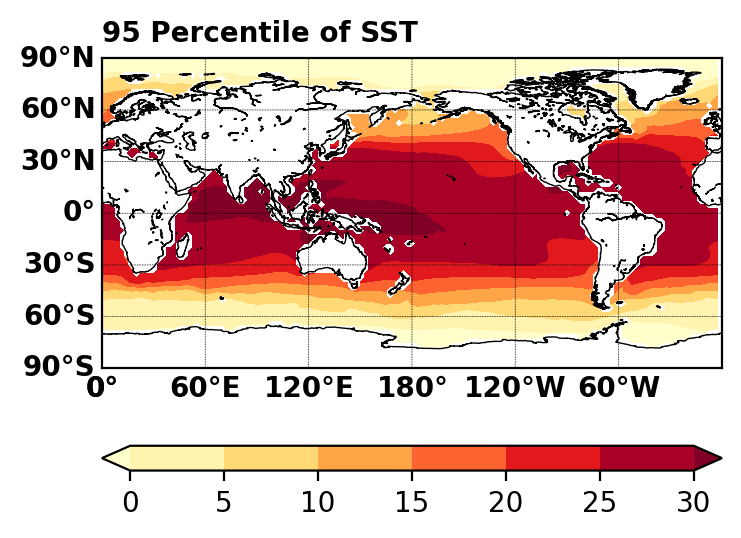

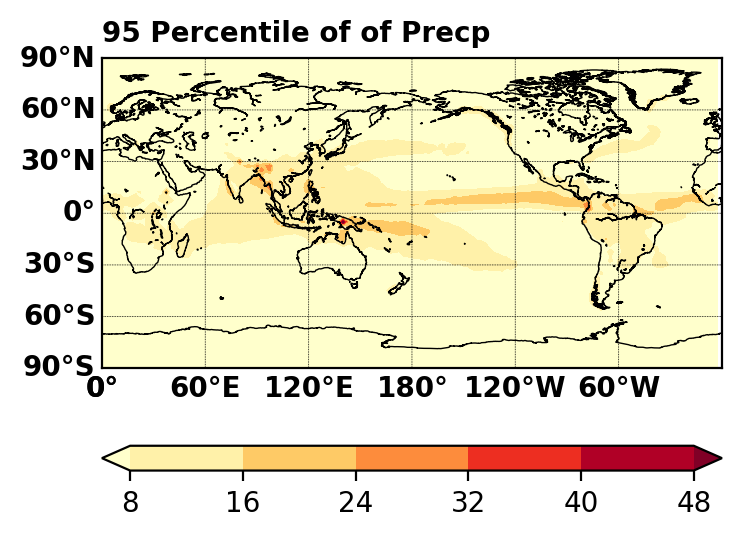

In [11]:
sst_95per = np.percentile(sst-273, 95,axis=0)
precp_95per=np.percentile(precp, 95, axis=0)
mapplot(sst_95per, None, plt.cm.YlOrRd, "95 Percentile of SST")
mapplot(precp_95per, None, plt.cm.YlOrRd, "95 Percentile of of Precp")
# sst_var

## **Question 7: Nino 3.4**
### **Read data and plot using xarray module**

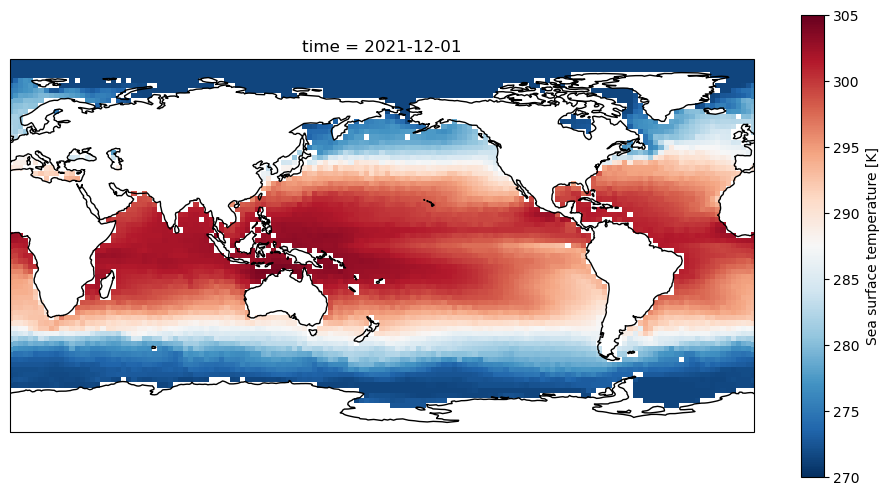

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr
import cartopy.crs as ccrs

link = "../datasets/era5_sst_1959_2021_25deg.nc"

data = xr.open_dataset(link)

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
data.sst.isel(time=-1).plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r, vmin=270, vmax = 305)
# data.sst.isel(time = -1).plot()
ax.coastlines()

In [16]:
data

<xarray.Dataset>
Dimensions:  (time: 756, lon: 144, lat: 73)
Coordinates:
  * time     (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2021-12-01
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Jul 07 12:24:21 2022: cdo remapbil,r144x73 era5_sst_195...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

### **Plot subregion Nino 3.4 index**


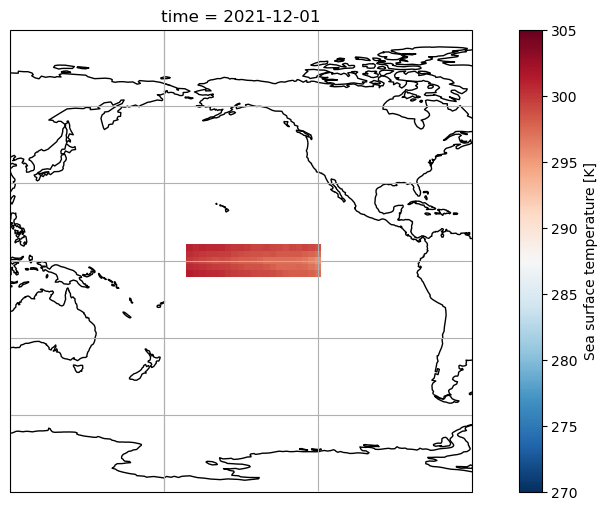

In [13]:

nino34 = data.sel(lat=slice(-5,5), lon=slice(190, 240))
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()
ax.gridlines()
nino34.sst.isel(time=-1).plot(
    ax=ax, transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r, vmin=270, vmax = 305
)
ax.set_extent((120, 300, 10, -10))

### **Anormal**


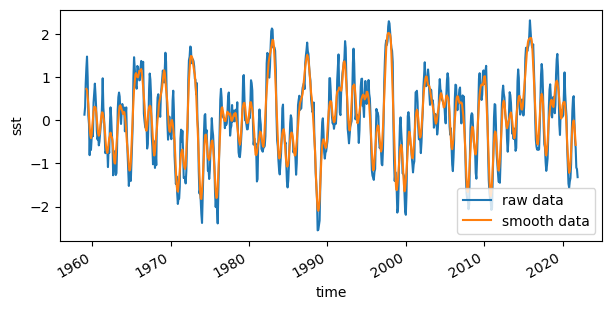

In [14]:

nino = np.array(nino34['sst'])
nino_mean = np.mean(nino, axis=(1,2))
nino_mean = nino_mean - np.mean(nino_mean, axis=0)
plt.figure(figsize=(7,3))
nino34_index = nino34.mean(dim=['lat', 'lon'])
nino34_index = nino34_index - nino34_index.mean(dim=['time'])
nino34_index_mean = nino34_index.sst.rolling(time=7, center=True).mean()
nino34_index.sst.plot(label = "raw data")
nino34_index_mean.plot(label = "smooth data")
plt.legend(loc="lower right")

### **Normalize the anormal**


Text(0, 0.5, 'Standardized Anormal SST')

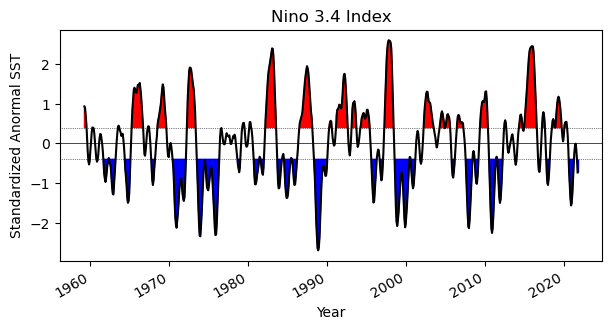

In [15]:

stdard_dev = nino34_index_mean.std()
nino34_index_mean_normalized = nino34_index_mean/stdard_dev

plt.figure(figsize=(7,3))
plt.axhline(0, color='black', lw=0.5)
plt.axhline(0.4, color='black', linewidth=0.5, linestyle='dotted')
plt.axhline(-0.4, color='black', linewidth=0.5, linestyle='dotted')
nino34_index_mean_normalized.plot(color='k')

plt.fill_between(nino34_index_mean_normalized.time, nino34_index_mean_normalized.where(nino34_index_mean_normalized>0.4).data, 0.4, color = 'red')

plt.fill_between(nino34_index_mean_normalized.time, nino34_index_mean_normalized.where(nino34_index_mean_normalized<-0.4).data, -0.4, color = 'blue')
plt.title("Nino 3.4 Index")
plt.xlabel("Year")
plt.ylabel("Standardized Anormal SST")
